
# Project: Investigating TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The goal of this project is to analyze the data in the dataset named "TMDB Movie Dataset" which contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.

**General Notes About the Dataset:**

* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)
characters.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

**Questions to be answered:**

* What are the most common genres ?  
* What is the average rating for each genre ? 
* Did movies with high vote count receive a better rating?
* How does the amount of movies change from year to year ? 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
df= pd.read_csv('tmdb-movies.csv')

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Clearly, there are some columns that has null values so it must be treated. Note that only the columns that would help in answering the questions will be dealt with while the rest will be discarded. 

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Budget and revenue are important since we can get income out of them. Also, note that budget_adj and revenue_adj were chosen specifically since they relate all movies to a specific time reference.  

In [10]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Both generes and production_companies have multiple entries in them so it must be splited 


### Data Cleaning 

#### Chosing the columns of interest 

In [11]:
df=df[['popularity','genres','production_companies','release_year','vote_count','vote_average','budget_adj','revenue_adj']]

In [12]:
#Simple feature engineering 
df['income']= df['revenue_adj'] - df['budget_adj']

In [13]:
df=df[['popularity','genres','production_companies','release_year','vote_count','vote_average','income']]

In [14]:
df.head()

,popularity,genres,production_companies,release_year,vote_count,vote_average,income
0,32.985763,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,5562,6.5,1.254446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,6185,7.1,2.101614e+08
2,13.112507,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,2480,6.3,1.704191e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,5292,7.5,1.718723e+09
4,9.335014,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,2947,7.3,1.210949e+09


#### Removing Null values 

In [15]:
new_data = df.dropna(axis= 0, how='any')

#### Spliting genre to get their count

In [16]:
liste_genres = set()
for s in new_data['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)

In [21]:
for genre in liste_genres:
    new_data[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
new_data[:5]

C:\Users\RAlth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,popularity,genres,production_companies,release_year,vote_count,vote_average,income,Crime,Horror,Drama,...,Documentary,Comedy,Family,History,Science Fiction,Romance,Foreign,Music,Action,War
0,32.985763,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,5562,6.5,1.254446e+09,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,28.419936,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,6185,7.1,2.101614e+08,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,13.112507,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,2480,6.3,1.704191e+08,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,11.173104,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,5292,7.5,1.718723e+09,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,9.335014,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,2947,7.3,1.210949e+09,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Now we have the desired dataframe. Let's move to the EDA

<a id='eda'></a>
## Exploratory Data Analysis

### What are the most common genres ? 

In [22]:
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, new_data[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)

In [23]:
label=[]
count=[]
for i in range(len(genre_count)):
    label.append(genre_count[i][0])
    count.append(genre_count[i][1])

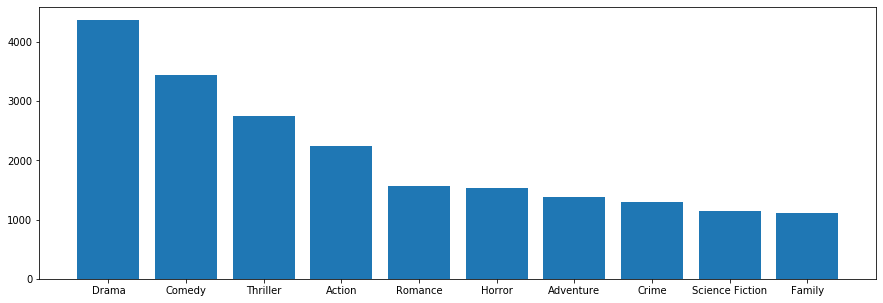

In [24]:
f, ax = plt.subplots(figsize=(15,5))
plt.bar(label[:10],count[:10]);

This figure shows the number of movies for each genere in the entire dataset

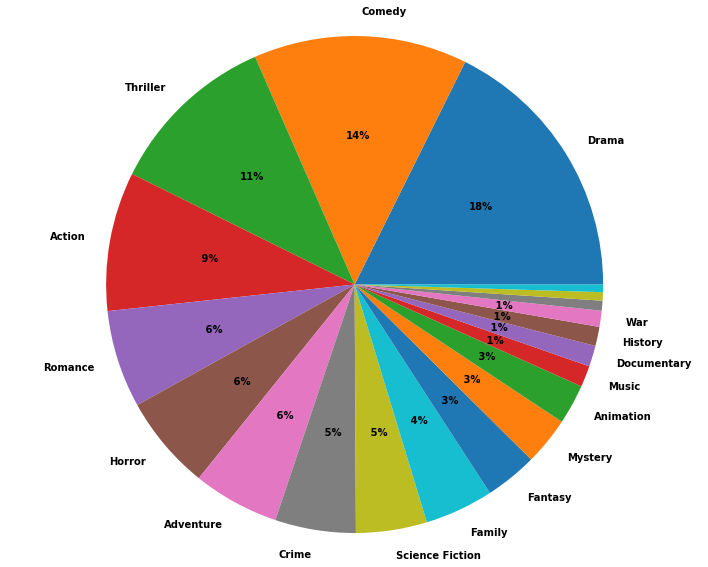

In [25]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10,8))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, new_data[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()

The previous figure shows that 18% of the movies in the dataset are in the genre of Drama, then follows the Drama the Comdey by 14 %

### What is the average rating for each genre ?

In [26]:
mean_per_genre = pd.DataFrame(liste_genres)

In [27]:
newArray = []*len(liste_genres)
for genre in liste_genres:
    newArray.append(new_data.groupby(genre, as_index=True)['vote_average'].mean())
newArray2 = []*len(liste_genres)
for i in range(len(liste_genres)):
    newArray2.append(newArray[i][1])

mean_per_genre['mean_votes_average']=newArray2

In [28]:
mean_per_genre=mean_per_genre.sort_values(by ='mean_votes_average', ascending=False)

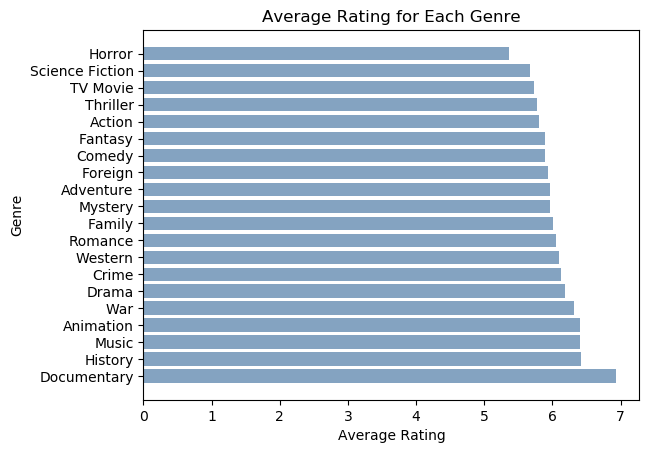

In [29]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(mean_per_genre.iloc[:,0],mean_per_genre.iloc[:,1], align='center',color=(0.2, 0.4, 0.6, 0.6))

ax.set_xlabel('Average Rating')
ax.set_ylabel('Genre')

ax.set_title('Average Rating for Each Genre'); 

Clearly, from the above figure Documentary has the highest average rating (7) and what follows it is History, Music and Animation with almost similar average rating. 

### Did movies with high vote count receive a better rating?

Text(0.5, 1.0, 'Vote Average vs Vote Count')

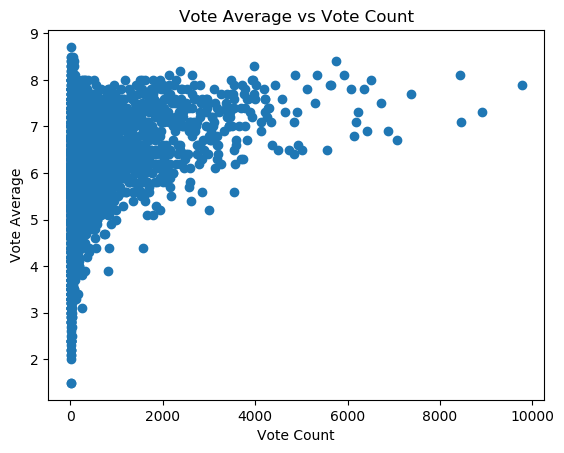

In [30]:
plt.scatter(new_data['vote_count'],new_data['vote_average'])
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.title('Vote Average vs Vote Count')

In [31]:
new_data.iloc[:,[4,5]].corr()

,vote_count,vote_average
vote_count,1.000000,0.276996
vote_average,0.276996,1.000000


In general, movies with a higher vote count receive a higher vote average.

### How does the amount of movies change from year to year ? 

In [32]:
year_count=new_data.groupby(by='release_year').count().iloc[:,1]

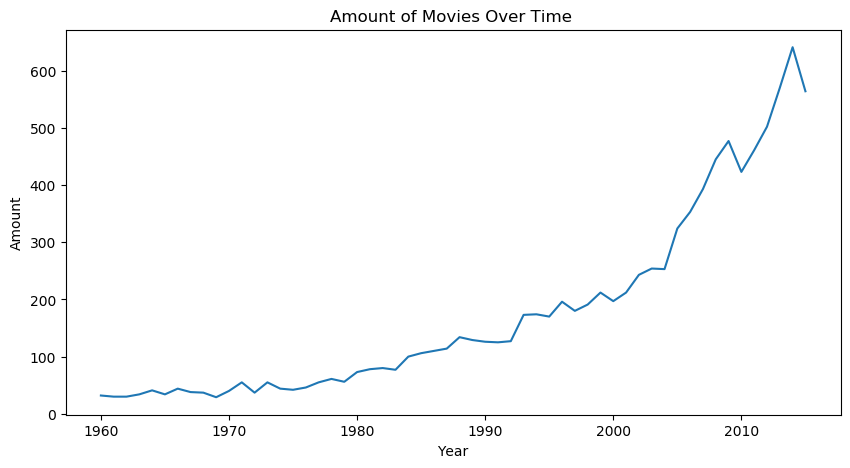

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(year_count)
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Amount of Movies Over Time ');

This figure shows that the amount of movies is in an increasing pattern in general. 

<a id='conclusions'></a>
## Conclusions



In summary, four questions were answered. Firstly, it turns out the Drama is most common genre for all the years in the dataset. Secondly, Documentary showed that it has the highest average rating among all genres with an average rating of roughly 7. Thirdly, the scatter plot and the correlation between vote count and vote average do not indicate that movies with a higher vote count receive a higher vote average. Lastly, the amount of movies seems to increase from one year to another. 



#### Limitations

1- The analysis is limited to only provided dataset. For example, the dataset does not confirm that every release of every director is listed which lead to the fact that results that we have are just true for this dataset and can not be generlized.  



2- Dropping missing or Null values from variables of our interest might skewed our analysis and could show unintentional bias towards relationship being analyzed.

3- The analysis did not involve any advanced stastisitics, in particular, inferential stats which will not allow us to draw conclusions about the movies that are not included in the dataset  